In [6]:
!nvidia-smi

Mon Mar 27 02:38:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.141.03   Driver Version: 470.141.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:89:00.0 Off |                    0 |
| N/A   30C    P0    42W / 300W |      3MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Setup environment

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Infer

In [20]:
workspace_dir = '/nfs/Workspace/CardiacSeg'

import os
import sys
from pathlib import PurePath
sys.path.append(workspace_dir)

import pandas as pd

from monai.transforms import (
   Compose,
   AddChanneld,
   EnsureChannelFirstd,
   LoadImaged,
   Orientationd,
   SqueezeDimd,
   LoadImage
)

from datasets.chgh_dataset import get_data_dicts
from data_utils.utils import get_pid_by_file
from data_utils.visualization import show_img_lbl, show_img_lbl_pred, show_img_lbl_preds, show_img_lbl_preds_overlap

from expers.infer_utils import get_tune_model_dir, get_data_path, get_pred_path

model_name = 'unet3d' #'unetcnx_x3_2_2'
data_name = 'chgh'
sub_data_dir_name = 'dataset_2'
exp_name = 't_3_f3'#'exp_2_2_x3_2_2' #'exp_2_2_x3_2_2' #'t_1' #'exp_2_2_1_x0' #'exp_2_2_x0_t6'
data_dict_file_name = 'exp_2_2_f3.json'#'exp_2_2.json'

root_exp_dir = os.path.join(
    workspace_dir, 
    'exps',
    'exps',
    model_name,
    data_name,
    'tune_results'
)

root_data_dir = os.path.join(
    workspace_dir, 
    'dataset',
    data_name
)

data_dir = os.path.join(root_data_dir, sub_data_dir_name)

# '/nfs/Workspace/CardiacSeg/exps/exps/unetcnx_x0/chgh/models' 
model_dir = get_tune_model_dir(root_exp_dir, exp_name)

best_checkpoint = os.path.join(model_dir, 'best_model.pth')
final_checkpoint = os.path.join(model_dir, 'final_model.pth')

infer_dir = os.path.join(
    workspace_dir, 
    'exps',
    'exps',
    model_name,
    data_name,
    'infers',
    exp_name,
)

print('\nbest model:',best_checkpoint)
print('infer dir:',infer_dir)

pid = 'pid_1000'
data_dict = get_data_path(data_dir, pid)
data_dict['pred'] = get_pred_path(root_exp_dir, exp_name, data_dict['image'])

img_pth = data_dict['image']
lbl_pth = data_dict['label'] 
print(img_pth)
print(lbl_pth)
print(data_dict['pred'])

%cd /nfs/Workspace/CardiacSeg/exps/exps/{model_name}/{data_name}

Loading results from /nfs/Workspace/CardiacSeg/exps/exps/unet3d/chgh/tune_results/t_3_f3...

Best trial 056ea_00000: 
config: {'exp': {'exp': 't_3_f3'}}
tt_dice: 0.80686474
tt_hd95: 27.640544002872463
best log dir: /nfs/Workspace/CardiacSeg/exps/exps/unet3d/chgh/tune_results/t_3_f3/main_056ea_00000_0_exp=exp_t_3_f3_2023-03-25_01-33-18

best model: /nfs/Workspace/CardiacSeg/exps/exps/unet3d/chgh/tune_results/t_3_f3/main_056ea_00000_0_exp=exp_t_3_f3_2023-03-25_01-33-18/models/best_model.pth
infer dir: /nfs/Workspace/CardiacSeg/exps/exps/unet3d/chgh/infers/t_3_f3
/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000.nii.gz
/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000_gt.nii.gz
/nfs/Workspace/CardiacSeg/exps/exps/unet3d/chgh/tune_results/infers/t_3_f3/pid_1000.nii.gz
/nfs/Workspace/CardiacSeg/exps/exps/unet3d/chgh


Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.


In [21]:
!/opt/conda/bin/python /nfs/Workspace/CardiacSeg/expers/infer.py \
--model_name={model_name} \
--data_name={data_name} \
--data_dir={data_dir} \
--model_dir={model_dir} \
--infer_dir={infer_dir} \
--checkpoint={best_checkpoint} \
--img_pth={img_pth} \
--lbl_pth={lbl_pth} \
--out_channels=2 \
--patch_size=4 \
--drop_rate=0.2 \
--depth 4 4 8 4 \
--a_min=-42 \
--a_max=423 \
--space_x=0.7 \
--space_y=0.7 \
--space_z=1.0 \
--roi_x=128 \
--roi_y=128 \
--roi_z=128 \
# --infer_overlap=0.25
# --a_min=-42 \
# --a_max=423 \
# --a_min=-175 \
# --a_max=250 \

On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
cuda is available
model: unet3d
=> loaded checkpoint '/nfs/Workspace/CardiacSeg/exps/exps/unet3d/chgh/tune_results/t_3_f3/main_056ea_00000_0_exp=exp_t_3_f3_2023-03-25_01-33-18/models/best_model.pth')
infer data: {'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000.nii.gz', 'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000_gt.nii.gz'}
<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
infer test time aug:
dice: 0.8427298
hd95: 27.65863337187866
infer test original:
dice: 

## Eval

In [35]:
data_dir = '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06'

# img_pth='/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000.nii.gz'
# lbl_pth='/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000_gt.nii.gz'
# pred_pth='/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000_unetcnx.nii.gz'

print(data_dir)

/nfs/Workspace/CardiacSeg/dataset/chgh/block_06


In [36]:
# training
!PYTHONPATH=/nfs/Workspace/CardiacSeg /opt/conda/bin/python /nfs/Workspace/CardiacSeg/expers/eval_label.py \
--out_channels=2 \
--a_min=-42 \
--a_max=423 \
--space_x=1.0 \
--space_y=1.0 \
--space_z=1.0 \
--data_dir={data_dir}
# --img_pth={img_pth} \
# --lbl_pth={lbl_pth} \
# --pred_pth={pred_pth} \

cuda is available
/nfs/Workspace/CardiacSeg/dataset/chgh/block_06
infer data: {'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000.nii.gz', 'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000_gt.nii.gz', 'pred': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000_pwsb.nii.gz'}
<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
pred name: pwsb
dice: 0.813605
hd95: 9.1104335791443

infer data: {'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000.nii.gz', 'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000_gt.nii.gz', 'pred': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000_t.nii.gz'}
pred name: t
dice: 0.776614
hd95: 17.291616465790582

infer data: {'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/block_06/pid_1000.nii.gz', 'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/blo

# Summarize exp results

## summartize data dict and dice, save out dir

In [25]:
import os
from pprint import pprint
import shutil

from expers.infer_utils import get_data_path, get_pred_path, get_tune_dir, get_eval_csv_path, get_eval_val


pid = 'pid_1000'
root_dir = '/nfs/Workspace/CardiacSeg/exps/exps'

%cd {root_dir}

exp_name = 't_3_f3'
model_names = ['unet3d', 'attention_unet', 'cotr', 'unetr', 'swinunetr', 'unetcnx_x3_2_2']
exp_names = [exp_name for _ in model_names] 
root_exp_dirs = [os.path.join(root_dir, m, 'chgh') for m in model_names]

is_save_output = True
out_dir = './output'
out_infer_dir = os.path.join(out_dir, 'infers')
out_eval_dir = os.path.join(out_dir, 'evals')
os.makedirs(os.path.join(out_infer_dir), exist_ok=True)
os.makedirs(os.path.join(out_eval_dir), exist_ok=True)


data_dict = get_data_path(data_dir, pid)
dice_dict = {}
for exp_name, model_name, root_exp_dir in zip(exp_names, model_names, root_exp_dirs):
    key = f'{model_name}'
    
    # add pred path to data dict
    data_dict[key] = get_pred_path(root_exp_dir, exp_name, data_dict['image'])

    # read dice by pid
    tune_dir = get_tune_dir(os.path.join(root_exp_dir, 'tune_results', exp_name))
    csv_pth = get_eval_csv_path(tune_dir)
    dice_dict[key] = get_eval_val(csv_pth, pid)
    
    if is_save_output:
        # copy pred file
        shutil.copyfile(data_dict[key], os.path.join(out_infer_dir, f'{model_name}_{pid}.nii.gz'))

        # copy csv file
        shutil.copyfile(csv_pth, os.path.join(out_eval_dir, f'{model_name}_best_model.csv'))


pprint(data_dict)
pprint(dice_dict)

/nfs/Workspace/CardiacSeg/exps/exps
{'attention_unet': '/nfs/Workspace/CardiacSeg/exps/exps/attention_unet/chgh/infers/t_3_f3/pid_1000.nii.gz',
 'cotr': '/nfs/Workspace/CardiacSeg/exps/exps/cotr/chgh/infers/t_3_f3/pid_1000.nii.gz',
 'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000.nii.gz',
 'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000_gt.nii.gz',
 'swinunetr': '/nfs/Workspace/CardiacSeg/exps/exps/swinunetr/chgh/infers/t_3_f3/pid_1000.nii.gz',
 'unet3d': '/nfs/Workspace/CardiacSeg/exps/exps/unet3d/chgh/infers/t_3_f3/pid_1000.nii.gz',
 'unetcnx_x3_2_2': '/nfs/Workspace/CardiacSeg/exps/exps/unetcnx_x3_2_2/chgh/infers/t_3_f3/pid_1000.nii.gz',
 'unetr': '/nfs/Workspace/CardiacSeg/exps/exps/unetr/chgh/infers/t_3_f3/pid_1000.nii.gz'}
{'attention_unet': {'dice': 0.8688726, 'hd95': 67.32013071882734},
 'cotr': {'dice': 0.88423043, 'hd95': 13.638181696985855},
 'swinunetr': {'dice': 0.8762162, 'hd95': 12.041594578792296},
 'unet3d': {'d

Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.
Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.
Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.
Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.
Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.
Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.


In [84]:
# !rm -rf  output.zip

In [94]:
!zip -r output.zip output

updating: output/ (stored 0%)
updating: output/infers/ (stored 0%)
updating: output/infers/unet3d_pid_1000.nii.gz (deflated 36%)
updating: output/infers/attention_unet_pid_1000.nii.gz (deflated 38%)
updating: output/infers/cotr_pid_1000.nii.gz (deflated 44%)
updating: output/infers/unetr_pid_1000.nii.gz (deflated 46%)
updating: output/infers/swinunetr_pid_1000.nii.gz (deflated 48%)
updating: output/infers/unetcnx_x3_2_2_pid_1000.nii.gz (deflated 44%)
updating: output/evals/ (stored 0%)
updating: output/evals/unet3d_best_model.csv (deflated 31%)
updating: output/evals/attention_unet_best_model.csv (deflated 32%)
updating: output/evals/cotr_best_model.csv (deflated 32%)
updating: output/evals/unetr_best_model.csv (deflated 32%)
updating: output/evals/swinunetr_best_model.csv (deflated 31%)
updating: output/evals/unetcnx_x3_2_2_best_model.csv (deflated 30%)
updating: output/vis/ (stored 0%)
updating: output/vis/unet3d_pid_1000_c.png (deflated 0%)
updating: output/vis/attention_unet_pid_10

## load out dir

In [31]:
import os
from pprint import pprint
import shutil

from expers.infer_utils import get_data_path, get_pred_path, get_tune_dir, get_eval_csv_path, get_eval_val

out_dir = './output'
out_infer_dir = os.path.join(out_dir, 'infers')
out_eval_dir = os.path.join(out_dir, 'evals')


data_dict = get_data_path(data_dir, pid)
dice_dict = {}
model_names = ['unet3d', 'attention_unet', 'cotr', 'unetr', 'swinunetr', 'unetcnx_x3_2_2']
for model_name in model_names:
    pred_path = os.path.join(out_infer_dir, f'{model_name}_{pid}.nii.gz')
    data_dict[model_name] = pred_path
    
    csv_pth = os.path.join(out_eval_dir, f'{model_name}_best_model.csv')
    dice_dict[model_name] = get_eval_val(csv_pth, pid)['dice']

pprint(data_dict)
pprint(dice_dict)

{'attention_unet': './output/infers/attention_unet_pid_1000.nii.gz',
 'cotr': './output/infers/cotr_pid_1000.nii.gz',
 'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000.nii.gz',
 'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_1000/pid_1000_gt.nii.gz',
 'swinunetr': './output/infers/swinunetr_pid_1000.nii.gz',
 'unet3d': './output/infers/unet3d_pid_1000.nii.gz',
 'unetcnx_x3_2_2': './output/infers/unetcnx_x3_2_2_pid_1000.nii.gz',
 'unetr': './output/infers/unetr_pid_1000.nii.gz'}
{'attention_unet': 0.8688726,
 'cotr': 0.88423043,
 'swinunetr': 0.8762162,
 'unet3d': 0.8338301,
 'unetcnx_x3_2_2': 0.8860478,
 'unetr': 0.8495043}


# Show exp results

In [32]:
keys = list(data_dict.keys())

loader = Compose([
    LoadImaged(keys=keys),
    EnsureChannelFirstd(keys=keys),
    Orientationd(keys=keys, axcodes='PLI'),
    SqueezeDimd(keys=keys)
])

data = loader(data_dict)

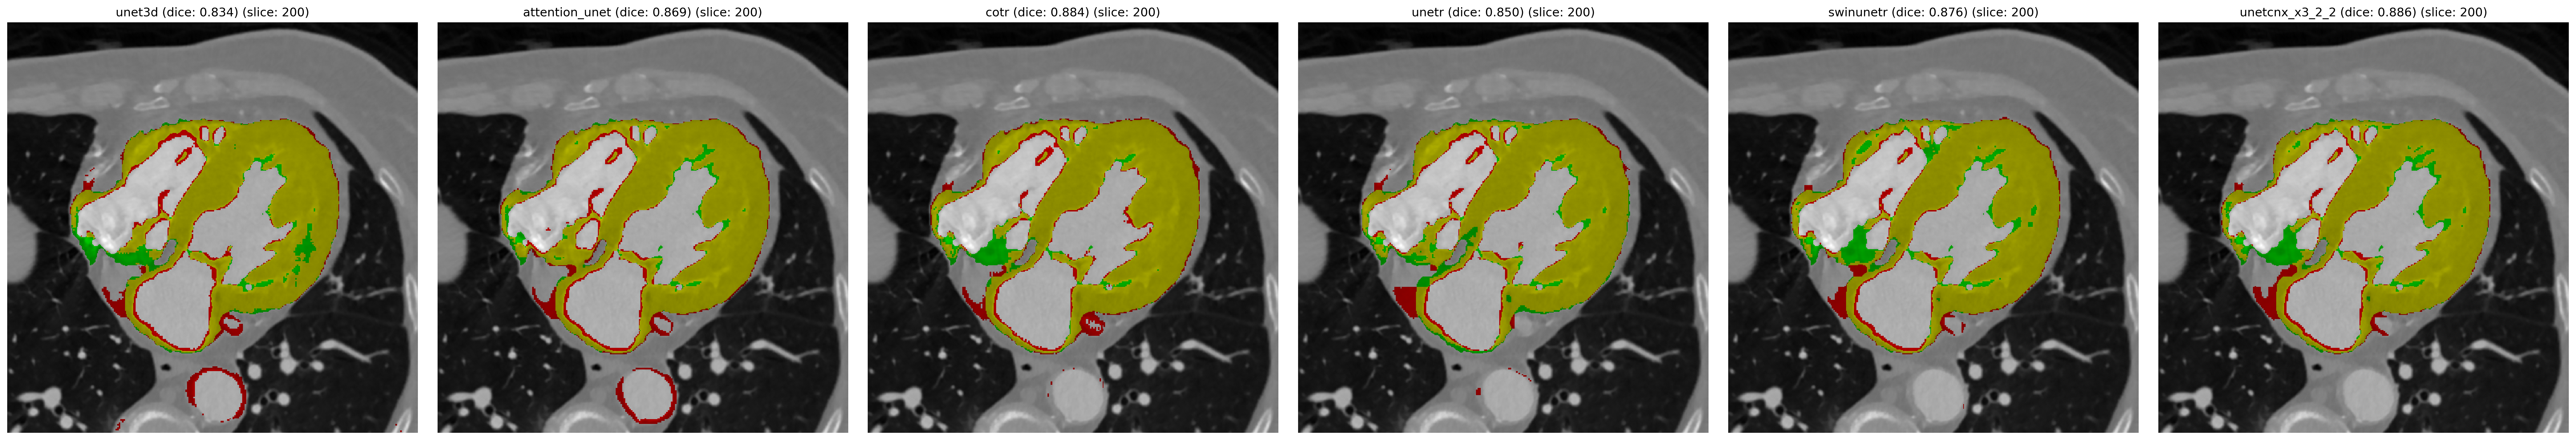

In [33]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams["figure.facecolor"] = 'none'

from expers.infer_utils import get_img_lbl_preds

num_classes = 2
slice_idxs = [200] #[100,150,200,250]
alpha = 0.5
axis_off = True
#num_img = len(data_dict)
#fig_size = (num_img*5, num_img*len(slice_idxs))
num_img = len(data_dict) - 2 
fig_size = (num_img*6, len(slice_idxs)*6)
show_img = False
show_lbl_dc = True

keys = dice_dict.keys()

pred_titles = [f'{key} (dice: {dice_dict[key]:.3f})'for key in keys]

imgs, lbls, preds = get_img_lbl_preds(data, keys, slice_idxs, mode='a')

# show_img_lbl_preds
show_img_lbl_preds_overlap(
    imgs,
    lbls,
    preds,
    pred_titles,
    slice_idxs,
    num_classes,
    axis_off,
    alpha,
    fig_size,
    show_img, 
    show_lbl_dc
)

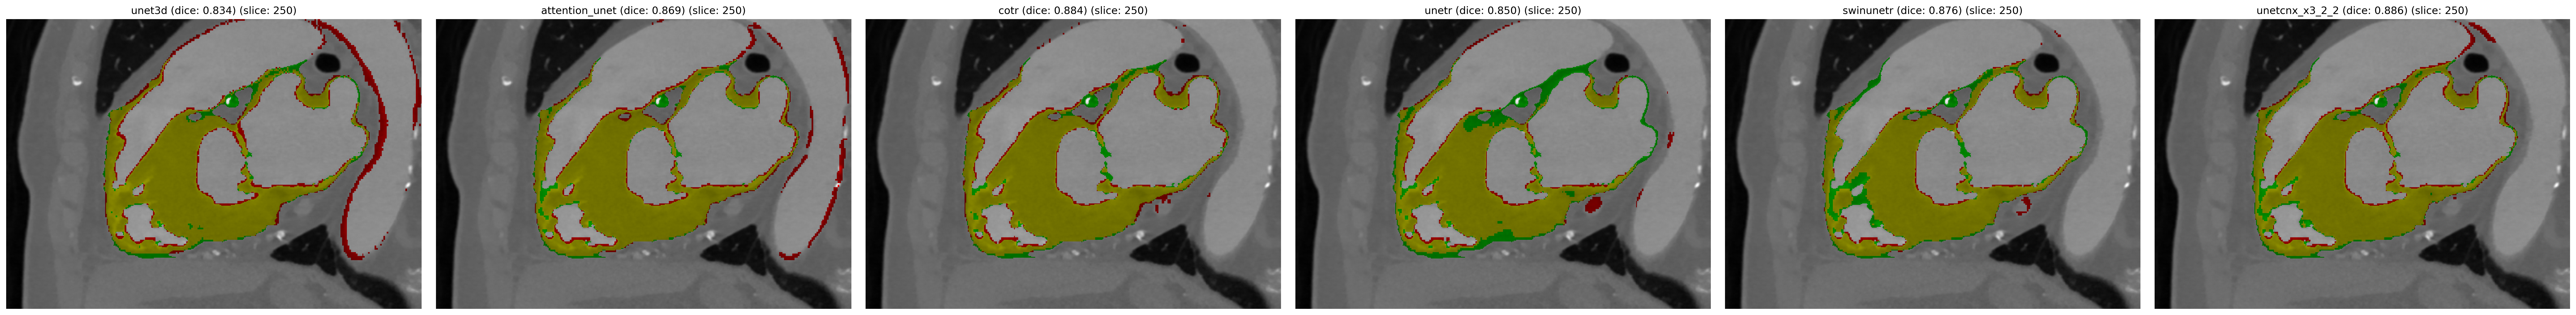

In [34]:
slice_idxs = [250] #[150,250,350]
fig_size = (num_img*7, len(slice_idxs)*5)

imgs, lbls, preds = get_img_lbl_preds(data, keys, slice_idxs, mode='s', is_trans=True)

#show_img_lbl_preds
show_img_lbl_preds_overlap(
    imgs,
    lbls,
    preds,
    pred_titles,
    slice_idxs,
    num_classes,
    axis_off,
    alpha,
    fig_size,
    show_img, 
    show_lbl_dc
)

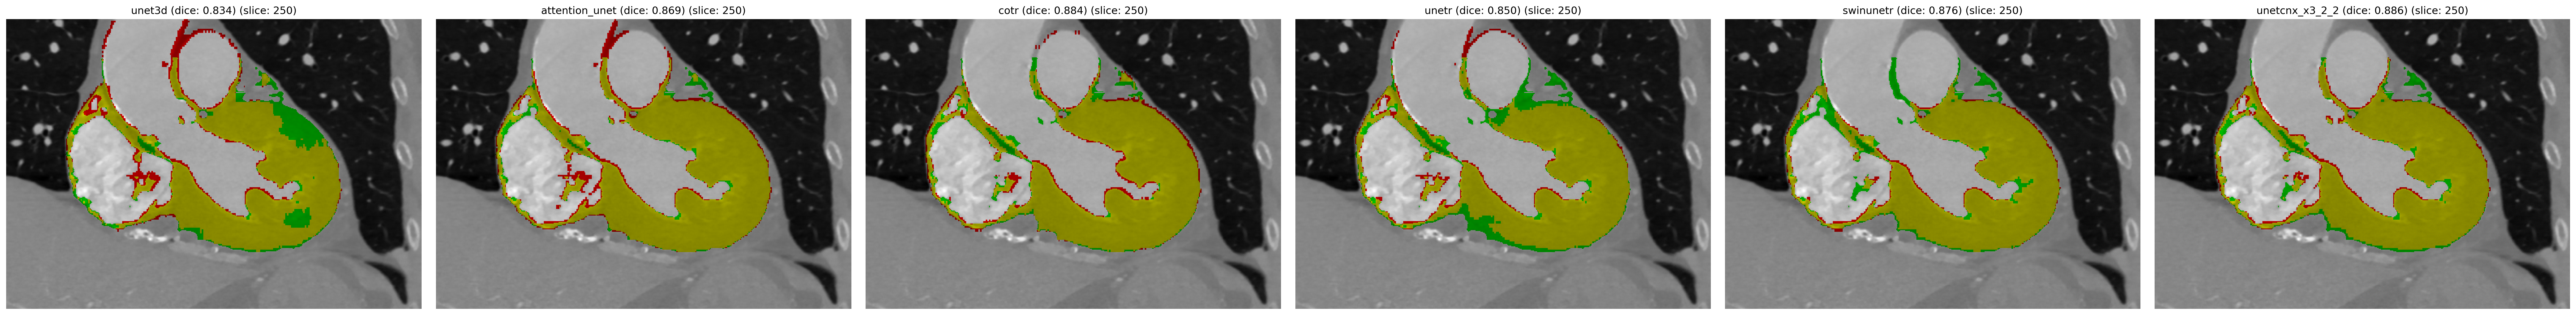

In [67]:
slice_idxs = [250] # [200,250,350]
fig_size = (num_img*7, len(slice_idxs)*5)

imgs, lbls, preds = get_img_lbl_preds(data, keys, slice_idxs, mode='c', is_trans=True)

#show_img_lbl_preds
show_img_lbl_preds_overlap(
    imgs,
    lbls,
    preds,
    pred_titles,
    slice_idxs,
    num_classes,
    axis_off,
    alpha,
    fig_size,
    show_img, 
    show_lbl_dc,
)

In [68]:
slice_idxs = [250] # [200,250,350]
fig_size = (num_img*7, len(slice_idxs)*5)

imgs, lbls, preds = get_img_lbl_preds(data, keys, slice_idxs, mode='c', is_trans=True)

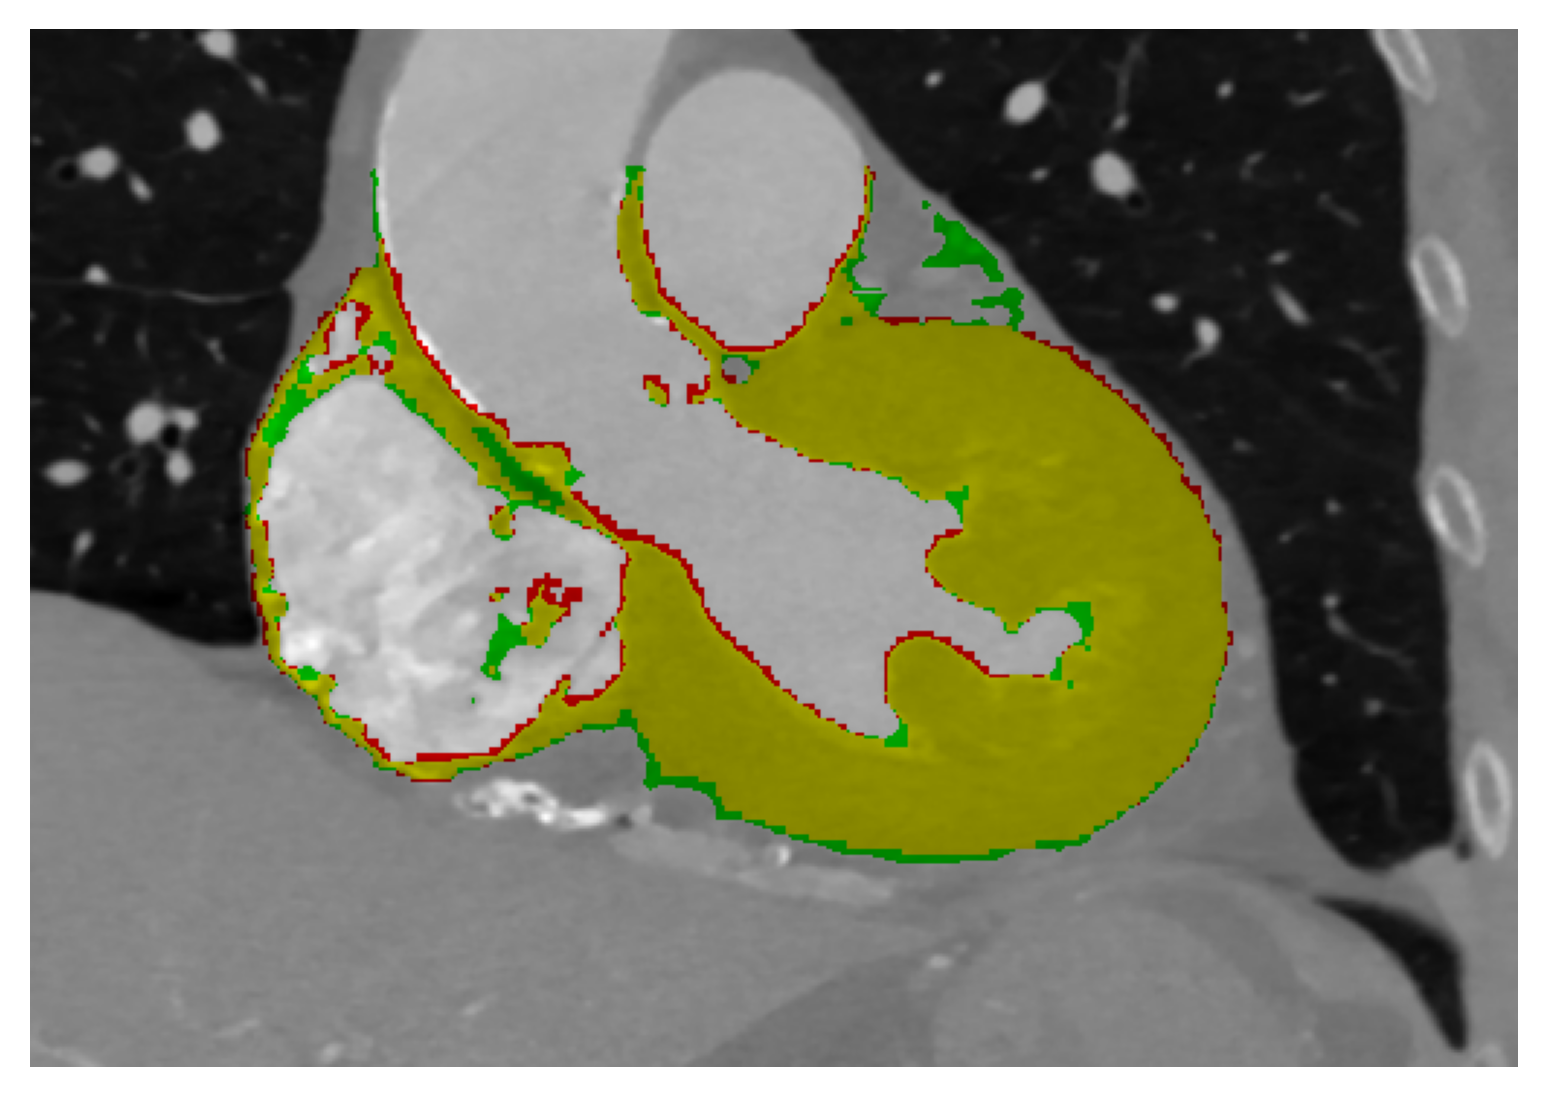

In [93]:
from data_utils.visualization import get_pred_label_overlap_img

out_dir = './output'
pid = 'pid_1000'
out_vis_dir = os.path.join(out_dir, 'vis')
os.makedirs(out_vis_dir, exist_ok=True)

img, lbl = imgs[0], lbls[0]
for pred, model_name in zip(preds[0], keys):
    overlap_img = get_pred_label_overlap_img(img, pred, lbl)
    plt.imshow(overlap_img)
    plt.axis('off')
    plt.savefig(
        os.path.join(out_vis_dir, f'{model_name}_{pid}_c.png'),
        bbox_inches='tight', 
        pad_inches=0
    )